# Lookback time (LCDM movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
17 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
from LookbackTimeLib import *
N = 15
E4 = efuncsq(a4, w0waCDM4)/N
M4 = Om(a4, w0waCDM4)/N
K4 = Ok(a4, w0waCDM4)/N
L4 = w0waCDM4.Ode(a2z(1.))/N
Q4 = L4*np.ones_like(t)

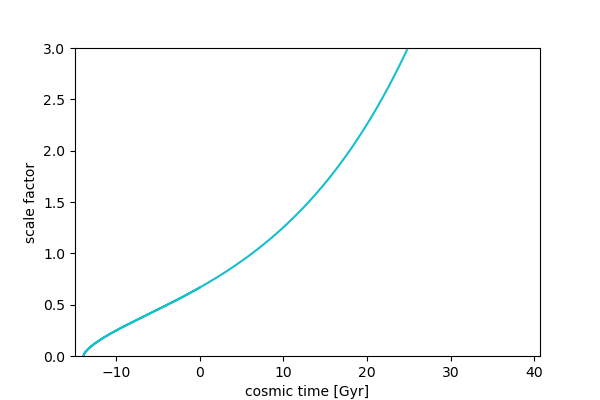

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_xlim([tmin-1.,tmax])
ax.set_xlabel("cosmic time [Gyr]")
ax.set_ylim([0.,3.])
ax.set_ylabel("scale factor")
ax.plot(t, a4, color="C9")

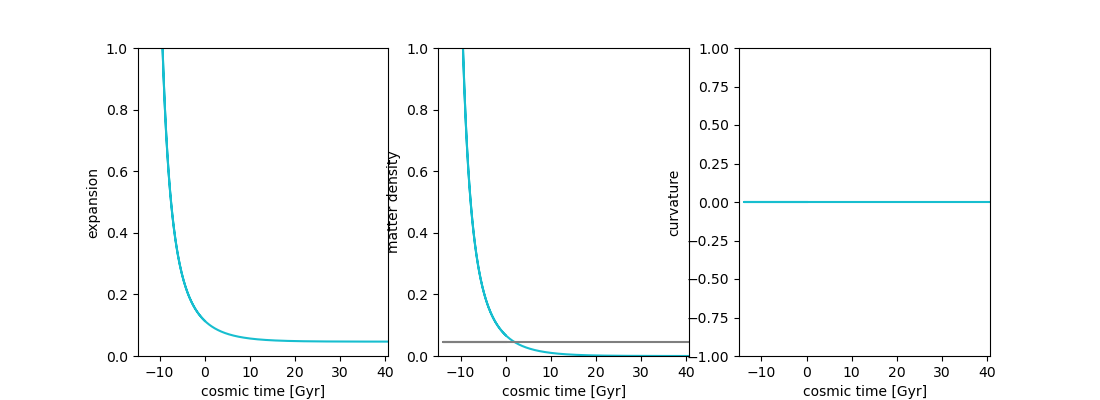

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(11,4))
ax0.set_xlim([tmin-1.,tmax])
ax0.set_xlabel("cosmic time [Gyr]")
ax0.set_ylim([0.,1.])
ax0.set_ylabel("expansion")
ax0.plot(t, E4, color="C9")

ax1.set_xlim([tmin-1.,tmax])
ax1.set_xlabel("cosmic time [Gyr]")
ax1.set_ylim([0.,1.])
ax1.set_ylabel("matter density")
ax1.plot(t, M4, color="C9")
ax1.plot(t, Q4, color="C7")

ax2.set_xlim([tmin-1.,tmax])
ax2.set_xlabel("cosmic time [Gyr]")
ax2.set_ylim([-1.,1.])
ax2.set_ylabel("curvature")
ax2.plot(t, K4, color="C9")

In [5]:
class movie:
    @staticmethod
    def set_xvalues(polygon, x0, x1):
        _ndarray = polygon.get_xy()
        _ndarray[:, 0] = [x0, x0, x1, x1, x0]
        polygon.set_xy(_ndarray)
        
    def __init__(self, alist, Elist, Mlist, Qlist, Klist):
        plt.clf()
        self.fig, ((self.ax0a), (self.ax0b), (self.ax0c), (self.ax0d), (self.ax0e)) =\
        plt.subplots(5,1, figsize=(3,5), height_ratios=[1, 0.1, 0.1, 0.1, 0.1])
        self.ax0a.remove()
        self.ax0a = self.fig.add_subplot(5,1,1,projection='3d')
        self.fig.tight_layout(pad=0., h_pad=-0.5)
        self.steps = len(alist)
        
        # Set timestepping
        self.alist = alist
        self.astart = alist[0]
        self.steps = len(alist)

        # Set bars
        self.Elist, self.Mlist, self.Qlist, self.Klist = Elist, Mlist, Qlist, Klist
        
        # Set the mesh size
        size = self.size = 3
        
        # Generate lattice points
        self.x, self.y, self.z = np.tile(np.arange(size),size*size), np.tile(np.repeat(np.arange(size),size),size),\
        np.repeat(np.arange(size),size*size)
        self.mx, self.my, self.mz = np.meshgrid(range(size), range(size), range(size))

        # Set grid for recollapsing universe
        amax=1.
        self.x0max=amax*self.x+(1-amax)
        self.y0max=amax*self.y+(1-amax)
        self.z0max=amax*self.z+(1-amax)
        self.mx0max=amax*self.mx+(1-amax)
        self.my0max=amax*self.my+(1-amax)
        self.mz0max=amax*self.mz+(1-amax)
        
    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        astart = self.astart
        Elist, Mlist, Qlist, Klist = self.Elist, self.Mlist, self.Qlist, self.Klist
        ax0a = self.ax0a
        ax0b = self.ax0b
        ax0c = self.ax0c
        ax0d = self.ax0d
        ax0e = self.ax0e
        size = self.size
        
        # Remove axis labels
        ax0a.set_axis_off()
        # Set plot limits
        ax0a.set_xlim([0, size-1])
        ax0a.set_ylim([0, size-1])
        ax0a.set_zlim([0, size-1])
        # Set aspect equal
        ax0a.set_box_aspect([1, 1, 1])
        # Set projection angle
        ax0a.view_init(elev=20, azim=35)  # Set the elevation and azimuth angles
            
        # Scale lattice points
        x0=astart*self.x+(1-astart)
        y0=astart*self.y+(1-astart)
        z0=astart*self.z+(1-astart)
        mx0=astart*self.mx+(1-astart)
        my0=astart*self.my+(1-astart)
        mz0=astart*self.mz+(1-astart)
        
        # Plot lattice points
        self.plot0, = ax0a.plot(x0, y0, z0, linestyle="", color='C9', marker="o")
        
        # Plot the cubes
        self.lines_x0, self.lines_y0, self.lines_z0 = {}, {}, {}
        self.lines_x0max, self.lines_y0max, self.lines_z0max = {}, {}, {}
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i+1,j,k]], [my0[i,j,k], my0[i+1,j,k]],
                                                     [mz0[i,j,k], mz0[i+1,j,k]], color='C9')
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i,j+1,k]], [my0[i,j,k], my0[i,j+1,k]],
                                                     [mz0[i,j,k], mz0[i,j+1,k]], color='C9')
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i,j,k+1]], [my0[i,j,k], my0[i,j,k+1]],
                                                     [mz0[i,j,k], mz0[i,j,k+1]], color='C9')

        # Plot the energies
        for ax in {ax0b,ax0c,ax0d,ax0e}:
            ax.set_aspect(0.1)
            ax.set_ylim([0.,1.])
            ax.set_xlim([0.,1.])
            ax.set_xticks([])
            ax.set_yticks([])
            [x.set_linewidth(2.) for x in ax.spines.values()]
        self.E0 = ax0b.axvspan(0., Elist[0], color="C6")
        self.M0 = ax0c.axvspan(0., Mlist[0], color="C0")
        self.Q0 = ax0d.axvspan(0., Qlist[0], color="C7")
        self.K0 = ax0e.axvspan(0., -Klist[0], color="C2")
        self.barE0 = ax0b.axvline([Elist[0]], color="black")
        self.barM0 = ax0c.axvline([Mlist[0]], color="black")
        self.barQ0 = ax0d.axvline([Qlist[0]], color="black")
        self.barK0 = ax0e.axvline([-Klist[0]], color="black")
        
        return self.plot0, self.lines_x0, self.lines_y0, self.lines_z0,\
        self.E0, self.M0, self.K0, self.barE0, self.barM0, self.barK0,
    
    # Update function
    def update(self, frame):
        a0 = self.alist[frame]
        Elist, Mlist, Klist = self.Elist, self.Mlist, self.Klist
        size = self.size
        
        # Scale lattice points
        x0=a0*self.x+(1-a0)
        y0=a0*self.y+(1-a0)
        z0=a0*self.z+(1-a0)
        mx0=a0*self.mx+(1-a0)
        my0=a0*self.my+(1-a0)
        mz0=a0*self.mz+(1-a0)
        
        # Plot lattice points
        self.plot0.set_data(x0,y0)
        self.plot0.set_3d_properties(z0)
        
        # Plot the cubes
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x0[i,j,k].set_data([mx0[i,j,k], mx0[i+1,j,k]], [my0[i,j,k], my0[i+1,j,k]])
                    self.lines_x0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i+1,j,k]])
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y0[i,j,k].set_data([mx0[i,j,k], mx0[i,j+1,k]], [my0[i,j,k], my0[i,j+1,k]])
                    self.lines_y0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i,j+1,k]])
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z0[i,j,k].set_data([mx0[i,j,k], mx0[i,j,k+1]], [my0[i,j,k], my0[i,j,k+1]])
                    self.lines_z0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i,j,k+1]])

        # Plot the energies
        self.set_xvalues(self.E0, 0., Elist[frame])
        self.set_xvalues(self.M0, 0., Mlist[frame])
        # self.set_xvalues(self.Q0, 0., Mlist[frame])
        # self.set_xvalues(self.K0, 0., -Klist[frame])
        self.barE0.set_xdata([Elist[frame]])
        self.barM0.set_xdata([Mlist[frame]])
        # self.barQ0.set_xdata([Qlist[frame]])
        # self.barK0.set_xdata([-Klist[frame]])
        
        return self.plot0, self.lines_x0, self.lines_y0, self.lines_z0,\
        self.E0, self.M0, self.K0, self.barE0, self.barM0, self.barK0,
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=self.steps, init_func=self.init, blit=False)
        return animation

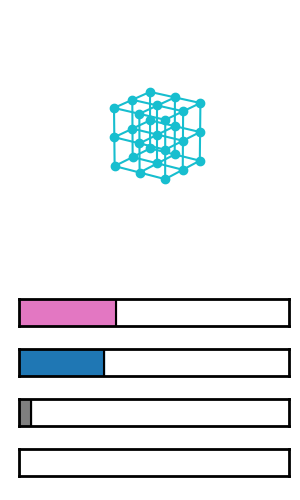

In [6]:
i=150
frame = movie(a4, E4, M4, Q4, K4)
frame.init();
frame.update(i);

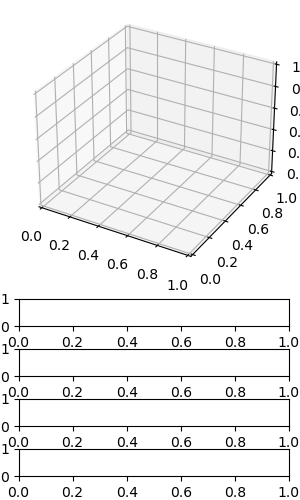

In [7]:
this_movie = movie(a4, E4, M4, Q4, K4)
animation = this_movie.animate()

In [8]:
animation.save("output/LookbackTimeLCDM.mp4", dpi=300, fps=48)